In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from __future__ import division

In [2]:
def cylindrical_projection(lidar, 
                           ver_fov = (-24.9, 2.), 
                           hor_fov = (-40, 40), 
                           v_res = 0.42,
                           h_res = 0.35,
                           d_max = None):
    '''
    lidar: a numpy array of shape N*D, D>=3
    ver_fov : angle range of vertical projection in degree
    hor_fov: angle range of horizantal projection in degree
    v_res : vertical resolusion
    h_res : horizontal resolution
    d_max : maximun range distance
    
    return : cylindrical projection (or panorama view) of lidar
    '''
    
    x = lidar[:,0]
    y = lidar[:,1]
    z = lidar[:,2]
    d = np.sqrt(np.square(x)+np.square(y))
    
    if d_max != None:
        d[d>d_max] = d_max
    
    
    theta = np.arctan2(-y, x)
    phi = -np.arctan2(z, d)
    
    x_view = np.int16(np.ceil((theta*180/np.pi - hor_fov[0])/h_res))
    y_view = np.int16(np.ceil((phi*180/np.pi + ver_fov[1])/v_res))
    
    x_max = int(np.ceil((hor_fov[1] - hor_fov[0])/h_res))
    y_max = int(np.ceil((ver_fov[1] - ver_fov[0])/v_res))
    
    
    indices = np.logical_and( np.logical_and(x_view >= 0, x_view <= x_max), 
                           np.logical_and(y_view >= 0, y_view <= y_max)  )
    
    
    x_view = x_view[indices]
    y_view = y_view[indices]
    z = z[indices]
    d = d[indices]
    d_z = [[d[i],z[i]] for i in range(len(d))]
    
    width_view = int(np.ceil((hor_fov[1] - hor_fov[0])/h_res))
    height_view = int(np.ceil((ver_fov[1] - ver_fov[0])/v_res))
    
    view = np.zeros([height_view+1, width_view+1, 2],dtype=np.float64)
    view[y_view,x_view] = d_z
    return view

In [11]:
def calc(lidar):
    
    view = cylindrical_projection(lidar, 
                           ver_fov = (-24.9, 2.), 
                           hor_fov = (-40,40), 
                           v_res = 0.42,
                           h_res = 0.35,
                           d_max = None)
    
    mean_depth=np.mean(view[:,:,0])
    mean_height=np.mean(view[:,:,1])
    variance_depth=np.var(view[:,:,0])
    variance_height=np.var(view[:,:,1])
    
    return mean_depth, mean_height, variance_depth, variance_height

In [12]:
def list_of_data(data_dir):
    
    #input : data directory
    #output: index of files of each folder
    
    list_of_lidar = []
    
    print('number of folders', len(os.listdir(data_dir)))
    
    for f in os.listdir(data_dir):
        path = os.path.join(data_dir, f)
        lidar_path = os.path.join(path, 'lidar')
        num_files = len(os.listdir(lidar_path))
    
        lidar = [os.path.join(lidar_path, 'lidar_'+str(i)+'.npy') for i in range(num_files) ]
        list_of_lidar += lidar
        
        
    return list_of_lidar

('number of folders', 37)
(10.782073777788398, -0.98610006643923021, 155.24291034844435, 0.75046486266728052)
(66, 230, 2)


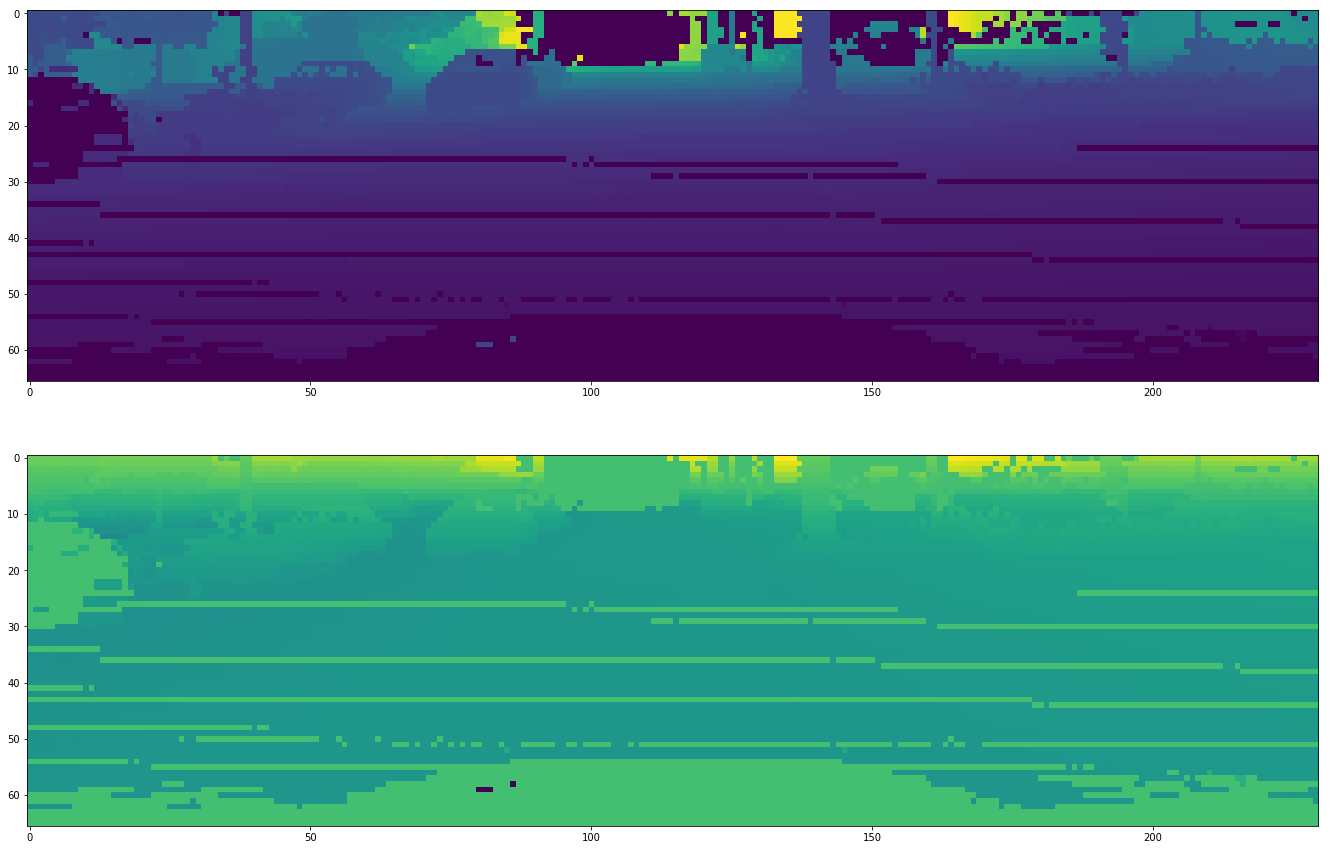

In [13]:
directory='/home/hanbin/Desktop/Udacity_challenge/our_didi_challenge/extract_kiti/' 
lidar_list=list_of_data(directory)
sample=lidar_list[1000]
lidar = np.load(sample)
view=cylindrical_projection(lidar)

print calc(lidar)
print(view.shape)
fig, ax = plt.subplots(2,1, figsize = (24,15))
ax[0].imshow(view[:,:,0])
ax[1].imshow(view[:,:,1]);
#print(view[30,30:60,1])

In [14]:
def automata():
    directory='/home/hanbin/Desktop/Udacity_challenge/our_didi_challenge/extract_kiti/' ## change this

    lidar_list=list_of_data(directory)
    
    mz = 0
    md = 0
    vz = 0
    vd = 0
    counter = 0
    
    print('number of total files', len(lidar_list))
    
    for lidar_file in lidar_list:
        lidar = np.load(lidar_file)
    
        result = calc(lidar)
                
        md += result[0]
        mz += result[1]
        vd += result[2]
        vz += result[3]
        counter += 1
        
        print"%.5f" % (100*counter/len(lidar_list)), 'percent done'
        
    md=md/counter
    mz=mz/counter
    vd=vd/counter
    vz=vz/counter
    
    print( md, mz, vd, vz)

In [15]:
automata()

('number of folders', 37)
('number of total files', 12482)
0.00801 percent done
0.01602 percent done
0.02403 percent done
0.03205 percent done
0.04006 percent done
0.04807 percent done
0.05608 percent done
0.06409 percent done
0.07210 percent done
0.08012 percent done
0.08813 percent done
0.09614 percent done
0.10415 percent done
0.11216 percent done
0.12017 percent done
0.12818 percent done
0.13620 percent done
0.14421 percent done
0.15222 percent done
0.16023 percent done
0.16824 percent done
0.17625 percent done
0.18427 percent done
0.19228 percent done
0.20029 percent done
0.20830 percent done
0.21631 percent done
0.22432 percent done
0.23233 percent done
0.24035 percent done
0.24836 percent done
0.25637 percent done
0.26438 percent done
0.27239 percent done
0.28040 percent done
0.28842 percent done
0.29643 percent done
0.30444 percent done
0.31245 percent done
0.32046 percent done
0.32847 percent done
0.33648 percent done
0.34450 percent done
0.35251 percent done
0.36052 percent d

KeyboardInterrupt: 